In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_theme(style="whitegrid")

### Criação de analise de frequência

In [3]:
file_name = './dataset/tabela_frequencia.csv'

In [4]:
df = pd.read_csv(file_name, sep=';', index_col=0)
df.head()

,País de Origem
Indivíduo,
1,Brasil
2,Inglaterra
3,Japão
4,EUA
5,Brasil


In [5]:
# Frequência absoluta
tabela_frequencia = df['País de Origem'].value_counts().reset_index()
tabela_frequencia.columns = ['País de Origem', 'Frequência Absoluta']

# Frequência relativa
tabela_frequencia['Frequência Relativa'] = tabela_frequencia['Frequência Absoluta'] / df.shape[0]

# Frequência acumulada
tabela_frequencia['Frequência Acumulada'] = tabela_frequencia['Frequência Absoluta'].cumsum()

# Frequência relativa acumulada
tabela_frequencia['Frequência Relativa Acumulada'] = tabela_frequencia['Frequência Relativa'].cumsum()

# Ordenar por país de origem
#tabela_frequencia.sort_values(by='País de Origem', ascending=False, inplace=True)

# Adicionar linha de soma
soma = pd.DataFrame({
    'País de Origem': ['Total'],
    'Frequência Absoluta': [tabela_frequencia['Frequência Absoluta'].sum()],
    'Frequência Relativa': [tabela_frequencia['Frequência Relativa'].sum()],
    'Frequência Acumulada': [tabela_frequencia['Frequência Acumulada'].iloc[-1]],
    'Frequência Relativa Acumulada': [tabela_frequencia['Frequência Relativa Acumulada'].iloc[-1]]
})
tabela_frequencia = pd.concat([tabela_frequencia, soma])

tabela_frequencia

,País de Origem,Frequência Absoluta,Frequência Relativa,Frequência Acumulada,Frequência Relativa Acumulada
0,Brasil,59,0.196667,59,0.196667
1,EUA,35,0.116667,94,0.313333
2,Índia,19,0.063333,113,0.376667
3,China,18,0.060000,131,0.436667
4,Uruguai,17,0.056667,148,0.493333
5,Japão,16,0.053333,164,0.546667
6,Austrália,15,0.050000,179,0.596667
7,África do Sul,14,0.046667,193,0.643333
8,Rússia,14,0.046667,207,0.690000
9,Inglaterra,12,0.040000,219,0.730000


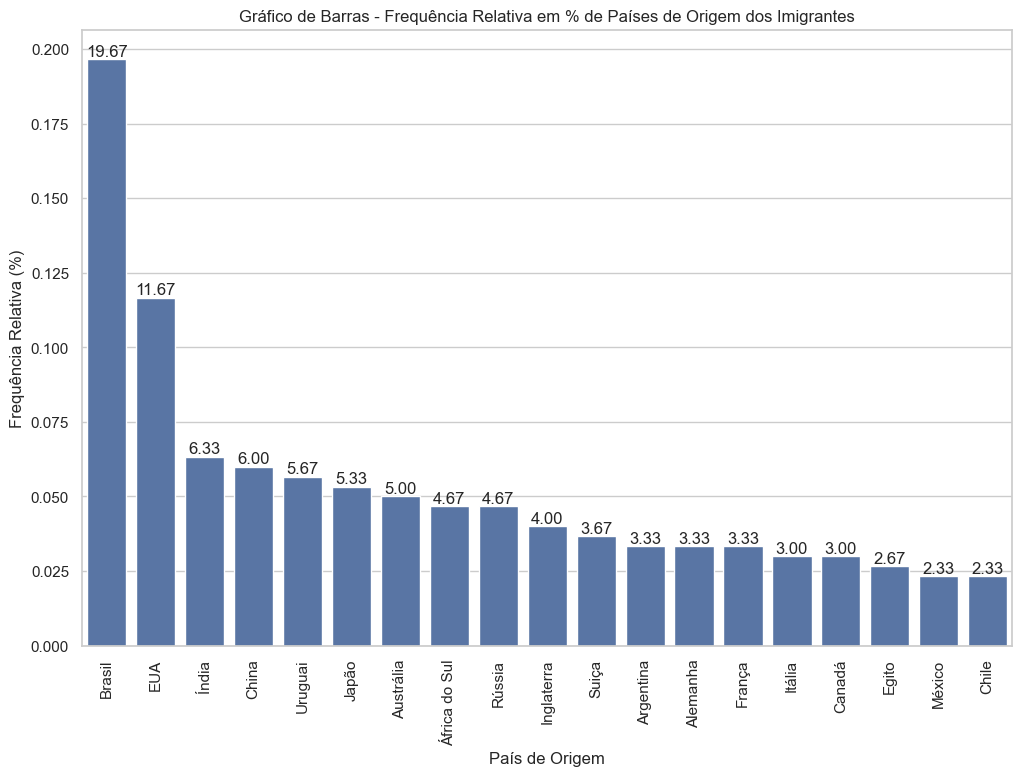

In [6]:
# Remover a linha com o valor "Total"
tabela_frequencia_sem_total = tabela_frequencia[tabela_frequencia['País de Origem'] != 'Total']

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=tabela_frequencia_sem_total, x='País de Origem', y='Frequência Relativa')

for patch in ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    ax.annotate(f'{y * 100:.2f}', (x, y), ha='center', va='bottom')

# Configurar o título e os rótulos dos eixos
plt.title('Gráfico de Barras - Frequência Relativa em % de Países de Origem dos Imigrantes')
plt.xlabel('País de Origem')
plt.xticks(rotation=90)
plt.ylabel('Frequência Relativa (%)')

# Exibir o gráfico
plt.show()


#### Analise Descritivas & Quantitativas

In [7]:
file_name = './dataset/observacao_precos.csv'

In [8]:
df = pd.read_csv(file_name, sep=';', index_col=0)
df['Preço ($)'] = df['Preço ($)'].str.replace(',', '.').astype(float)
df.head()

,Preço ($)
Nº Observação,
1,189.0
2,195.0
3,199.0
4,189.0
5,197.0


In [9]:
df_describe = df.describe().T
df_describe

,count,mean,std,min,25%,50%,75%,max
Preço ($),100.0,190.77,15.621052,149.0,179.0,189.0,199.0,239.0


In [10]:
# Calculate additional metrics
df_describe['Amplitude'] = df['Preço ($)'].max() - df['Preço ($)'].min()
df_describe['Variância'] = df['Preço ($)'].var()
df_describe['Erro Padrão'] =  df['Preço ($)'].std() / np.sqrt(len(df['Preço ($)']))
df_describe['Coeficiente de Variação'] = df['Preço ($)'].std() / df['Preço ($)'].mean()
df_describe['Coeficiente de Assimetria'] = df['Preço ($)'].skew()
df_describe['Coeficiente de Curtose'] = df['Preço ($)'].kurtosis()

df_describe.T


,Preço ($)
count,100.000000
mean,190.770000
std,15.621052
min,149.000000
25%,179.000000
50%,189.000000
75%,199.000000
max,239.000000
Amplitude,90.000000
Variância,244.017273


### Associção Qui²

In [11]:
file_name = './dataset/associacao_qui2.csv'

Processo manual para validar a associação com base no qui²

In [12]:
df = pd.read_csv(file_name, sep=';')
df.head()

,Operadora,Baixo,Médio,Alto
0,Total Health,40,16,12
1,Viva Vida,32,24,16
2,Mena Saúde,24,32,4


In [13]:
df['Total'] = df[df.columns[1:4]].sum(axis=1)
df

,Operadora,Baixo,Médio,Alto,Total
0,Total Health,40,16,12,68
1,Viva Vida,32,24,16,72
2,Mena Saúde,24,32,4,60


In [14]:
df_frequencia = pd.DataFrame()
df_frequencia['Operadora'] = df['Operadora']

for column in df.columns[1:4]:
    df_frequencia[column] = (df['Total'] * df[column].sum()) / df['Total'].sum()
df_frequencia

,Operadora,Baixo,Médio,Alto
0,Total Health,32.64,24.48,10.88
1,Viva Vida,34.56,25.92,11.52
2,Mena Saúde,28.80,21.60,9.60


In [15]:
df_residuos = pd.DataFrame()
df_residuos['Operadora'] = df['Operadora']
for column in df.columns[1:4]:
    df_residuos[column] = df[column] - df_frequencia[column]
df_residuos

,Operadora,Baixo,Médio,Alto
0,Total Health,7.36,-8.48,1.12
1,Viva Vida,-2.56,-1.92,4.48
2,Mena Saúde,-4.80,10.40,-5.60


In [16]:
df_x2 = pd.DataFrame()
df_x2['Operadora'] = df['Operadora']
for column in df.columns[1:4]:
    df_x2[column] = df_residuos[column] ** 2 / df_frequencia[column]
df_x2

,Operadora,Baixo,Médio,Alto
0,Total Health,1.659608,2.937516,0.115294
1,Viva Vida,0.189630,0.142222,1.742222
2,Mena Saúde,0.800000,5.007407,3.266667


In [17]:
x2_total = df_x2[df.columns[1:4]].sum().sum()
x2_total

15.860566448801741

In [18]:
from scipy.stats import chi2

# Graus de liberdade
from scipy.stats import chi2

# Graus de liberdade
shape = df.drop(columns=['Operadora', 'Total']).shape
freedom_ = (shape[1] - 1) * (shape[0] - 1)

# Valor p
p_value = chi2.sf(x2_total, freedom_)

p_value

0.003212084698153722

In [19]:
critical_value = chi2.ppf(0.95, freedom_)
critical_value

9.487729036781154

Processo automatizado

In [20]:
from scipy.stats import chi2_contingency, chi2

# Create a contingency table
contingency_table = df[['Baixo', 'Médio', 'Alto']].values

# Perform the chi-square test
chi2_value, p_value, degree_freedom, _ = chi2_contingency(contingency_table)
critical_value = chi2.ppf(0.95, int(degree_freedom))

# Print the results
print("Chi-square statistic:", chi2_value)
print("p-value:", p_value)
print("degree freedom:", degree_freedom)
print("critical value:", critical_value)
print("Conclusão: ", "Rejeitar H0" if chi2_value > critical_value else "Aceitar H0")


Chi-square statistic: 15.860566448801741
p-value: 0.003212084698153722
degree freedom: 4
critical value: 9.487729036781154
Conclusão:  Rejeitar H0


### Correlação de Person

In [21]:
file_name = './dataset/notas_provas.csv'

In [22]:
df = pd.read_csv(file_name, sep=';')
df.head()

,Nota Matemática,Nota Física,Nota Literatura
0,"5,50","7,50","9,00"
1,"9,00","8,50","5,50"
2,"4,50","5,00","6,50"
3,"6,50","8,00","6,50"
4,"7,50","6,00","5,00"


In [23]:
for column in df.columns:
    df[column] = df[column].apply(lambda x: x.replace('.', '').replace(',', '.')).astype(float)
df.head()

,Nota Matemática,Nota Física,Nota Literatura
0,5.5,7.5,9.0
1,9.0,8.5,5.5
2,4.5,5.0,6.5
3,6.5,8.0,6.5
4,7.5,6.0,5.0


In [24]:
from scipy.stats import pearsonr, t

In [25]:
corrs = []
for i, column in enumerate(df.columns):
    if i == len(df.columns) - 1:
        break
    for j in range(i+1, len(df.columns)):
        corr, p_value = pearsonr(df[column], df[df.columns[j]])
        corrs.append(dict(
            feature1=column,
            feature2=df.columns[j],
            corr=corr,
            p_value=p_value
        ))
df_corrs = pd.DataFrame(corrs)
df_corrs

,feature1,feature2,corr,p_value
0,Nota Matemática,Nota Física,0.602532,0.000426
1,Nota Matemática,Nota Literatura,-0.308783,0.096862
2,Nota Física,Nota Literatura,-0.289561,0.120647


In [26]:
results = []
for item in df_corrs.itertuples():
    feature1 = item.feature1
    feature2 = item.feature2
    corr = item.corr
    p_value = item.p_value

    critical_value = t.ppf(1-(0.05 / 2), df.shape[0] - 2)
    results.append(dict(
        feature1=feature1,
        feature2=feature2,
        corr=corr,
        p_value=p_value,
        critical_value=critical_value,
        reject_null=p_value < 0.05
    ))
df_results = pd.DataFrame(results)
df_results

,feature1,feature2,corr,p_value,critical_value,reject_null
0,Nota Matemática,Nota Física,0.602532,0.000426,2.048407,True
1,Nota Matemática,Nota Literatura,-0.308783,0.096862,2.048407,False
2,Nota Física,Nota Literatura,-0.289561,0.120647,2.048407,False


### Distribuição Binomial

Utilizado para variaveis categoricas univariada.

Quantidade de vezes que desejo SUCESSO em um numero de repeticação X à uma probabilidade p.

In [56]:
import scipy.stats as stats

# Set the parameters for the binomial distribution

n = 12  # Number of trials
p = 0.065  # Probability of success

stats.binom.pmf(2, n, p)


0.1423923827895976

In [57]:
k = list(range(0, 13))
k

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [60]:
probs = [stats.binom.pmf(i, n, p) for i in k]
probs

[0.44641556695081935,
 0.3724108472958708,
 0.1423923827895976,
 0.03299645233983542,
 0.005161209791124005,
 0.000574081089066199,
 4.6560943943871765e-05,
 2.7744489133857887e-06,
 1.2054757979283177e-07,
 3.7245835705450086e-09,
 7.767848088302421e-11,
 9.818378721237882e-13,
 5.688009063105716e-15]

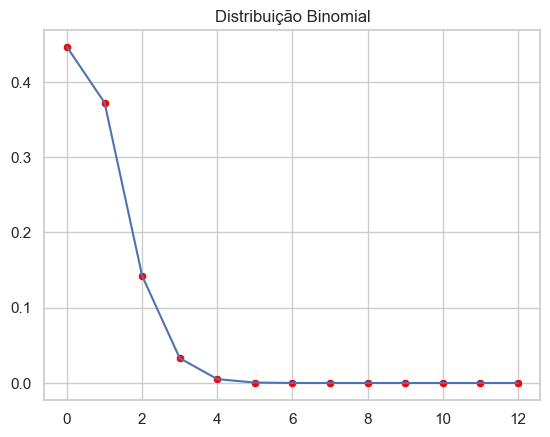

In [61]:
plt.title('Distribuição Binomial')
sns.lineplot(x=k, y=probs)
sns.scatterplot(x=k, y=probs, color='red')
plt.show()

### Distribuição Binomial Negativa

Utilizado para variaveis categoricas univariada.

Descobrir a probabilidade de ocorrer X vezes um evento em N tentativas com uma probabilidade p de sucesso

In [53]:
from scipy.stats import nbinom

# Parameters for the negative binomial distribution
p = .11 # Probabilidade de sucesso
x = 10 # Numero de Tentativas
k = 3 # Numero de sucessos
p_value = nbinom.pmf(x-k, k, p)

print("P-value:", p_value)


P-value: 0.021193886428541676


In [68]:
x = list(range(1, 21)) # Quantidade de tentativas
k = 2 # Numero de sucessos
p = 0.4 # Probabilidade de sucesso

In [69]:
probs = [nbinom.pmf((i-k), k, p) for i in x]
probs

[0.0,
 0.16000000000000003,
 0.19200000000000006,
 0.17279999999999998,
 0.13824,
 0.10368000000000004,
 0.07464960000000004,
 0.05225472000000001,
 0.03583180799999999,
 0.024186470400000003,
 0.01612431359999999,
 0.010642046975999998,
 0.0069657034752,
 0.0045277072588800005,
 0.0029255954595840006,
 0.0018807399383040059,
 0.0012036735605145594,
 0.0007673418948280315,
 0.00048748779200839663,
 0.00030874226827198485]

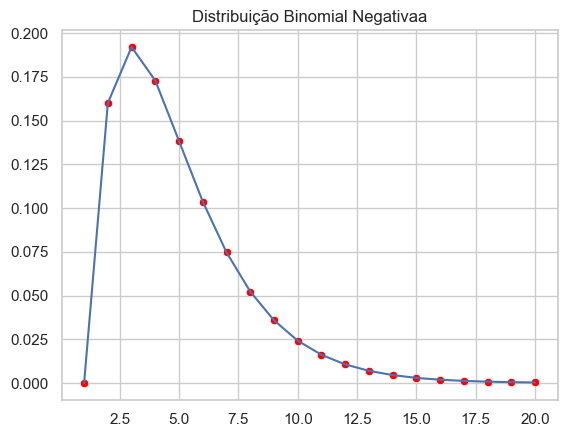

In [70]:
plt.title('Distribuição Binomial Negativaa')
sns.lineplot(x=x, y=probs)
sns.scatterplot(x=x, y=probs, color='red')
plt.show()

### Distribuição de Poisson

A distribuição de Poisson é uma distribuição de probabilidade discreta que descreve o número de eventos que ocorrem em um intervalo de tempo ou espaço fixo, quando esses eventos ocorrem de forma independente e em uma taxa média conhecida. Ela é utilizada quando estamos interessados em modelar a ocorrência de eventos raros em um determinado período de tempo ou espaço, como o número de chamadas recebidas em um call center em um determinado intervalo de tempo, o número de acidentes de trânsito em uma determinada região em um dia, entre outros. A distribuição de Poisson é caracterizada por ter uma média e uma variância iguais, e é amplamente utilizada em estatística, teoria das filas, engenharia, entre outras áreas.


In [73]:
from scipy.stats import poisson

# Parameters for the Poisson distribution
mu = 2 # Taxa de ocorrencia ao longo do tempo (período)
k = 3 # Número de sucessos
p_value = poisson.pmf(k, mu)
p_value

0.18044704431548356

In [74]:
k = list(range(0, 11))
probs = [poisson.pmf(i, mu) for i in k]
probs

[0.1353352832366127,
 0.2706705664732254,
 0.2706705664732254,
 0.18044704431548356,
 0.09022352215774178,
 0.03608940886309672,
 0.012029802954365565,
 0.0034370865583901616,
 0.0008592716395975402,
 0.00019094925324389823,
 3.818985064877954e-05]

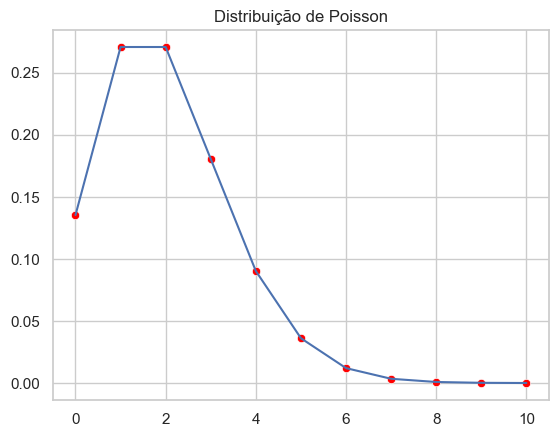

In [75]:
plt.title('Distribuição de Poisson')
sns.lineplot(x=k, y=probs)
sns.scatterplot(x=k, y=probs, color='red')
plt.show()

### Distribuição Normal

Aplicada á valores quantitativos.

A distribuição normal, também conhecida como distribuição de Gauss ou distribuição em forma de sino, é uma das distribuições de probabilidade mais importantes na estatística. Ela é caracterizada por sua forma simétrica em torno de um valor médio e sua curva suave.

A distribuição normal é amplamente utilizada em análises estatísticas devido a suas propriedades matemáticas e sua aplicabilidade em muitos fenômenos naturais e sociais. Ela é frequentemente utilizada em situações em que os dados seguem uma distribuição aproximadamente simétrica em torno de um valor médio.

Alguns exemplos de quando a distribuição normal é utilizada incluem:

1. Modelagem de dados: A distribuição normal é frequentemente utilizada para modelar dados contínuos, como altura, peso, tempo de reação, entre outros.

2. Testes de hipóteses: Muitos testes estatísticos, como o teste t de Student e o teste de ANOVA, assumem que os dados seguem uma distribuição normal para realizar inferências estatísticas.

3. Estimativa de parâmetros: A distribuição normal é utilizada em técnicas de estimativa de parâmetros, como a regressão linear, para estimar os coeficientes do modelo.

4. Controle de qualidade: Em processos de controle de qualidade, a distribuição normal é frequentemente utilizada para determinar limites de controle e identificar desvios significativos.

É importante ressaltar que nem todos os dados seguem uma distribuição normal. Em alguns casos, é necessário realizar transformações nos dados ou utilizar outras distribuições estatísticas adequadas para analisar os dados de forma correta.


* model.cdf: Função acumulada

* model.pdf: Função de ponto

In [157]:
from scipy.stats import norm

# Parameters for the normal distribution
mean = 0.028
std = 0.012
x = 0.03 # < 0.03

# Score Z
z_score = (x - mean) / std
print('Z score: ', z_score)

# Calculate the probability of a value being less than 0.03
p_value = norm.cdf(0.03, loc=mean, scale=std)
print('p-value: ', p_value)

Z score:  0.16666666666666652
p-value:  0.5661838326109035


In [134]:
zs = np.arange(-5, 5 , 0.1)
zs

array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
       -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
       -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
       -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
       -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
       -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -1.77635684e-14,  1.00000000e-01,
        2.00000000e-01,  

In [160]:
probs = [norm.pdf(z, loc=0, scale=1) for z in zs]
probs

[1.4867195147342979e-06,
 2.438960745893352e-06,
 3.961299091032062e-06,
 6.369825178867069e-06,
 1.014085206548667e-05,
 1.5983741106905332e-05,
 2.4942471290053356e-05,
 3.853519674208672e-05,
 5.8943067756539116e-05,
 8.926165717713167e-05,
 0.00013383022576488347,
 0.00019865547139276957,
 0.00029194692579145534,
 0.0004247802705507443,
 0.0006119019301137612,
 0.0008726826950457439,
 0.0012322191684729959,
 0.0017225689390536463,
 0.0023840882014647936,
 0.0032668190561998523,
 0.004431848411937913,
 0.005952532419775727,
 0.007915451582979793,
 0.010420934814422364,
 0.013582969233685318,
 0.017528300493568152,
 0.022394530294842407,
 0.028327037741600544,
 0.03547459284623067,
 0.043983595980426234,
 0.05399096651318691,
 0.06561581477467522,
 0.07895015830089255,
 0.09404907737688507,
 0.11092083467945342,
 0.12951759566588933,
 0.1497274656357422,
 0.17136859204780444,
 0.19418605498320982,
 0.21785217703254722,
 0.24197072451913992,
 0.2660852498987513,
 0.28969155276147934,


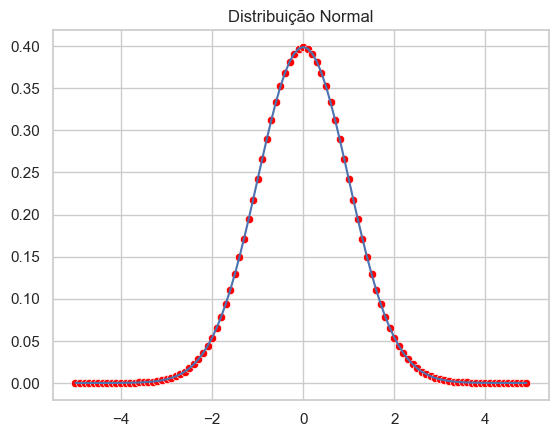

In [161]:
plt.title('Distribuição Normal')
sns.lineplot(x=zs, y=probs)
sns.scatterplot(x=zs, y=probs, color='red')
plt.show()